In [ ]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Sales.csv')
df

,OrderLine,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,ProductID,Category,SubCategory,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,USD261.96,2,0.00,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,USD731.94,3,0.00,219.58
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,USD14.62,2,0.00,6.87
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,USD957.58,5,0.45,-383.03
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,USD22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,FUR-FU-10001889,Furniture,Furnishings,USD25.25,3,0.20,4.10
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,FUR-FU-10000747,Furniture,Furnishings,USD91.96,2,0.00,15.63
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,TEC-PH-10003645,Technology,Phones,USD258.58,2,0.20,19.39
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,OFF-PA-10004041,Office Supplies,Paper,USD29.6,4,0.00,13.32


In [5]:
df.isna().sum()

OrderLine      0
OrderID        0
OrderDate      0
ShipDate       0
ShipMode       0
CustomerID     0
ProductID      0
Category       0
SubCategory    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

In [6]:
X = df[['Quantity','Discount']]
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)
print(y_pred)

[ 21.86368844   7.53289303  55.9817665  ...  14.69829074 -40.91598043
 -43.64422405]


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R2 score:', r2)


MSE: 45137.57660618742
MAE: 72.8734651355571
RMSE: 212.4560580595136
R2 score: 0.06904354181214134


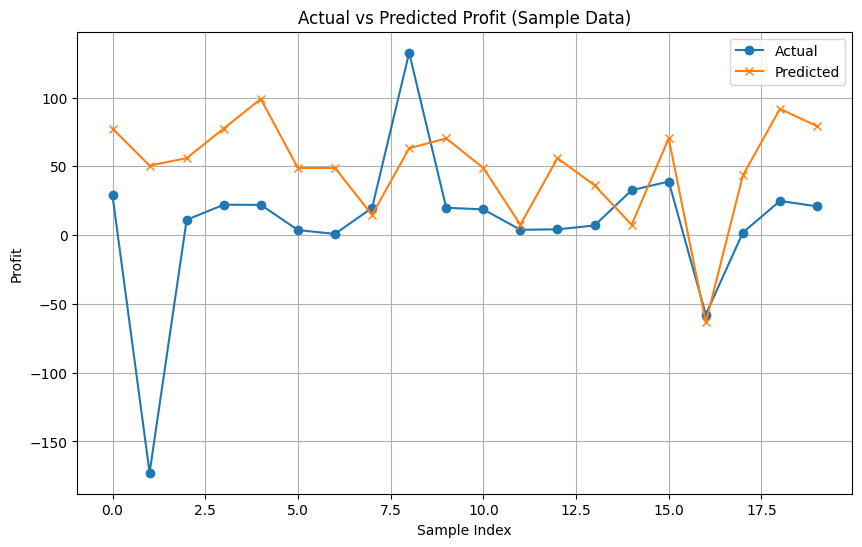

In [10]:
import matplotlib.pyplot as plt

# Generate sample data for visualization
sample_indices = np.random.choice(X_test.index, size=20, replace=False)
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]
sample_y_pred = model.predict(sample_X)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(sample_y_actual.values, label='Actual', marker='o')
plt.plot(sample_y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Profit (Sample Data)')
plt.xlabel('Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()